Cuaderno de trabajo de:
 - _Piloto_ : Nombre1 Apellido1 (username con el que os habéis logueado)
 - _Copiloto_ : Nombre2 Apellido2 [escribe el username2]

In [1]:
%matplotlib inline
import random

import numpy as np
import scipy as sc
import scipy.stats as st

import seaborn
import matplotlib.pyplot as plt

# Variable aleatoria

Una variable aleatoria es una función que depende de un suceso aleatorio.

$$
X:\Omega\rightarrow \mathbb{R}
$$

donde hay una medida de probabilidad $P$ sobre el *espacio muestral* $\Omega$.

## Tipos de variables aleatorias

**Definición**: El **soporte** de una variable aleatoria es el conjunto de valores que puede tomar.

Las variables aleatorias se clasifican según su soporte:
  -  Un conjunto finito de valores (**variable aleatoria discreta y finita**).
  -  Un conjunto infinito, pero contable. Por ejemplo, los números naturales (**variable aleatoria discreta infinita**).
  -  Un conjunto continuo, como un intervalo de números reales, o el conjunto de todos los números reales (**variable aleatoria continua**).

Observad que lo importante son los posibles valores de la variable aleatoria, y no la distribución de probabilidad sobre el espacio muestral.

Por ejemplo, supongamos que el viento puede soplar en cualquier dirección, que medimos en ángulo respecto al eje proa-popa. Definimos una variable aleatoria X, que sólo toma dos posibles valores:

 - 1 si el viento viene de babor (el ángulo está entre 0 y 180).
 - 0 en otro caso.

Independientemente de la distribución de probabilidad que siga la dirección del viento, la variable aleatoria X sólo toma dos posibles valores, y por lo tanto sigue una distribución de Bernoulli.

### Simular la distribución de una variable aleatoria

Si podemos hacer extracciones aleatorias de $\Omega$ según la distribución $P$ y conocemos la definición de la variable aleatoria $X$, podemos simular la distribución de la variable aleatoria.


### Ejemplo: lanzamos dos dados

Podemos representar el lanzamiento de dos dados con el siguiente modelo:

 - $\Omega$ son las tuplas $(a,b)$ donde $a$ y $b$ son dos números del 1 al 6.
 - $P$ es una medida de probabilidad que asigna a cada tupla $w=(a,b)$ la misma probabilidad: $ \left(\frac{1}{6}\right)^2 = \frac{1}{36}$.

Podemos definir varias variables aleatorias asociadas a este espacio de probabilidad:

 - X = "suma de los dos números"
 - Y = "1 si los dos números son iguales, 0 si son distintos"
 - Z = "suma de los dos cuadrados de los dos números"

In [2]:
def w():
    'Devuelve el resultado (aleatorio) de lanzar dos dados'
    return [random.randint(1,6), random.randint(1,6)]

def X(w):
    a,b = w
    return a+b

def Y(w):
    a,b = w
    return a==b
    
def Z(w):
    a,b = w
    return a**2 + b**2

In [3]:
#Podemos extraer un punto del espacio muestral, y
#evaluar las tres variables aleatorias
w0 = w()
w0, X(w0), Y(w0), Z(w0)

([1, 5], 6, False, 26)

In [4]:
#También podemos hacer una extracción y evaluar X inmediatamente
#pero así, el resultado de llamar a w() se pierde sin remedio
random.seed(2)
X(w())

2

In [5]:
#De esta forma, conservamos w0 para lo que sea
random.seed(2)
w0 = w()
X(w0)

2

In [6]:
#Si no usamos el mismo w0, las extracciones de X, Y, Z
#son independientes
#Ejercicio: ¿podrían estos tres valores provenir del mismo w?
random.seed(2)
w0 = w()
X(w0), Y(w0), Z(w0)

(2, True, 2)

In [7]:
#Si no usamos el mismo w0, las extracciones de X, Y, Z
#son independientes
#Ejercicio: ¿podrían estos tres valores provenir del mismo w?
random.seed(2)
X(w()), Y(w()), Z(w())

(2, False, 40)

Tomando una muestra aleatoria, podemos aproximar probabilidades asociadas a estas variables aleatorias.
Nos preguntamos por la probabilidad de que Z < 2X, por ejemplo...

In [8]:
N = 1000
muestra = [w() for _ in range(N)]

def Zmenorque2X(w0):
    return Z(w0) < 2*X(w0)

prob = sum(1 for w0 in muestra if Zmenorque2X(w0))/N
print('P(Z < 2X) ~ ', prob)

P(Z < 2X) ~  0.082


In [9]:
N = 1000
muestra = [w() for _ in range(N)]
prob = sum(1 for w0 in muestra if Z(w0) < 2*X(w0))/N
print('P(Z < 2X) ~ ', prob)

P(Z < 2X) ~  0.079


In [10]:
#Aumentamos el tamaño de la simulación y multiplicamos por 36
random.seed(1)
N = 100000
muestra = [w() for _ in range(N)]
prob = sum(1 for w0 in muestra if Z(w0) < 2*X(w0))/N
print('36 * P(Z < 2X) ~ ', 36*prob)

36 * P(Z < 2X) ~  3.00744


En un caso sencillo como éste podemos aplicar la fórmula de Cardano y calcular la probabilidad exacta.

In [11]:
# En este caso es más económico recorrer las 36 posibles tuplas
# con lanzamientos de dos dados, y usar que son todas equiprobables

# Contamos 3 casos favorables de un total de 36 casos posibles
# a es el resultado de lanzar el primer dado
for a in range(1,7):
    # b es el resultado de lanzar el segundo dado
    for b in range(1,7):
        # Si Z < 2*X...
        if a**2+b**2<2*(a+b):
            print(a,b)

1 1
1 2
2 1


## Función de masa de una variable aleatoria discreta

Para una variable aleatoria discreta $X$, definimos la **función de masa** $p_X$ como

$$
p_X(k) = P(X=k) = P(\{w\in\Omega: X(w)=k\})
$$

Si la función de masa corresponde a una distribución conocida, diremos:
  - "la variable aleatoria X sigue una distribución de Bernoulli con p=0.4"
ó 
  - "la variable aleatoria X se distribuye según una Binomial con p=0.2 y n=10"
por ejemplo.

#### Pregunta

Para el ejemplo anterior:

 - $\Omega$ son las tuplas $(a,b)$ donde $a$ y $b$ son dos números del 1 al 6.
 - $P$ es una medida de probabilidad que asigna a cada tupla $w=(a,b)$ la misma probabilidad: $ \left(\frac{1}{6}\right)^2 = \frac{1}{36}$.

Podemos definir varias variables aleatorias asociadas a este espacio de probabilidad:

Y = "1 si los dos números son iguales, 0 si son distintos"

 - ¿La variable aleatoria $Y$ sigue alguna distribución conocida?
 - ¿La medida de probabilidad $P$ sigue alguna distribución conocida?

#### Pregunta

Definimos $\Omega$ como el espacio de todas las listas de n ceros o unos: ``[x1,...,xn]``, donde cada lista es igual de probable.

$T(w)$ es la suma de todos los números de la lista ``w = [x1,...,xn]``: ¿Qué distribución sigue $T$?

In [12]:
#pang
def bernouilli(p):
    'Devuelve True con probabilidad p y False con probabilidad 1-p'
    return random.random()<p

In [13]:
n0 = 20

def w():
    'Devuelve el resultado (aleatorio) de lanzar n0 monedas'
    #random.randint(0,1) es 1 ó 0, cada uno con prob 1/2
    return [bernouilli(0.5) for j in range(n0)]

def T(w):
    return sum(w)

N = 10000
muestra = [T(w()) for i in range(N)]
plt.hist(muestra, bins=[k+0.5 for k in range(-1,n0+1)], density=1,alpha=0.8)

plt.show()

### Propiedad fundamental de la función de masa

La suma de todos los valores de la función de masa de una variable aleatoria discreta finita es $1$ (hay que sumar el valor en todos los elementos del soporte).

El motivo es que el soporte es un conjunto finito $F$. Para cualquier $w\in\Omega$, se tiene que $X(w)\in F$, luego:
$$
1 = P(X\in F) = \Sigma_{k\in F} \:P(X=k) =\Sigma_{k\in F} \:p_X(k)
$$

In [14]:
#Ejemplo: una distribución binomial
#La distribución depende de dos parametros
p0 = 0.2
n0 = 10
#El objeto B contiene los metodos asociados a una distribucion concreta de la familia binomial
Bin = st.binom(n=n0, p=p0)

In [15]:
#Bin.pmf es la función de masa de una VA Bin(n=10, p=0.2)
#El error se deba al redondeo del ordenador...
sum([Bin.pmf(k) for k in range(n0+1)])

0.9999999999999998

## Esperanza de una variable aleatoria discreta

Intuitivamente, la **esperanza** o **valor esperado** de una distribución de probabilidad es el **promedio** de los valores obtenidos al hacer muchas extracciones.

Si hacemos una extracción $\{x_i\}_{i=1}^N$ de tamaño N, y el valor k aparece $N_k$ veces, el promedio de los valores obtenidos es:
$$
\frac{1}{N}\Sigma_{i=1}^N \:x_i = \frac{1}{N}\Sigma_{k\in F}\: k\:N_k = \Sigma_{k\in F}\: k\frac{N_k}{N}
$$
Si $N$ es lo bastante grande, cada valor k del soporte de X aparece una proporción $p(k)$, luego $\frac{N_k}{N}\approx p(k)$:

$$
\frac{1}{N}\Sigma_{i=1}^N x_i = \Sigma_{k\in F} k\:\frac{N_k}{N} \approx \Sigma_{k\in F} k\:p(k)
$$

De forma precisa, para una VA discreta y finita son soporte $F$, **la esperanza se define como**:
$$
E(X) = \Sigma_{k\in F} k\:p(k)
$$

Una vez hemos definido una VA, construir su esperanza es aún más fácil que calcular probabilidades:

In [16]:
def promedio_muestra(va, w, N=1000):
    muestra = [w() for _ in range(N)]
    return sum(va(w0) for w0 in muestra )/N

#### Pregunta
¿Es razonable este valor para la variable X construida antes?

Recordamos que X = "suma de dos lanzamientos independientes de dados de 6 caras"


In [17]:
def w():
    'Devuelve el resultado (aleatorio) de lanzar dos dados'
    return [random.randint(1,6), random.randint(1,6)]

def X(w):
    a,b = w
    return a+b

def Y(w):
    a,b = w
    return a==b
    
def Z(w):
    a,b = w
    return a**2 + b**2

In [18]:
w0 = w()
x0 = X(w0)
print(w0, x0)

[5, 6] 11


In [19]:
N = 10000
sum([X(w()) for _ in range(N)])/N

7.0377

In [20]:
N = 10000
muestra = [w() for _ in range(N)]
sum(X(w0) for w0 in muestra)/N

6.98

In [21]:
random.seed(2)
promedio_muestra(X, w, N=1000)

7.008

## Transformación de una variable aleatoria discreta: g(X)

Si
$$
X:\Omega\rightarrow \mathbb{R}
$$
es una VA con soporte finito F y $g:\mathbb{R}\rightarrow\mathbb{R}$ es una función, podemos definir una *nueva variable aleatoria*
$$
g\circ X = g(X):\Omega\rightarrow \mathbb{R}
$$
como la composición $w\rightarrow(g\circ X)(w) = g(X(w))$.

### *Soporte* de la variable aleatoria g(X)

Es la imagen $g(F)$ por $g$ del conjunto $F$. *Soporte de g(X)* = $\{f(k),\; k\in F\}$.

#### Pregunta

U es una VA que se distribuye según una UniformeDiscreta(1,3) (es decir, toma los valores 1, 2 y 3 con la misma probabilidad $\frac{1}{3}$).

¿Cuál es el soporte de $U^2$?

### Función de masa de g(X)

Si la función $g$ es inyectiva en el soporte de $U$, es fácil escribir la función de masa de la VA $g(X)$:
$$
p_{g(X)}(g(x)) = p_{X}(x)
$$
o, con un cambio de variable $y=g(X)$:
$$
p_{g(X)}(y) = p_{X}(g^{-1}(y))
$$
Por ejemplo, si U se distribuye según una UniformeDiscreta(1,3), la función de masa de $U^2$ es
$$
p_{U^2}(1)=p_U(1)=1/3,\;p_{U^2}(4)=p_U(2)=1/3,\;p_{U^2}(9)=p_U(3)=1/3\;\text{ y } 0 \text{ en otro caso.}
$$
Si $g$ no es inyectiva, es más complicado de calcular porque $g^{-1}(y)$ no está bien definido. En vez de resolver este caso de forma exacta, lo haremos mediante simulación.

### Muestra aleatoria de g(X)

Si $\{x_1,\dots,x_N\}$ es una muestra aleatoria de $X$, entonces
$$\{g(x_1),\dots,g(x_N)\}$$
es una muestra aleatoria de g(X).

#### Ejemplo

U es una VA que se distribuye según una UniformeDiscreta(1,100):
 - calcular la probabilidad $P(U^2>1000)$.
 - calcular la probabilidad $P((U-50)^2>1000)$.

Como $g(x)=x^2$ es inyectiva en el soporte de $U$, podemos calcular (usando que $\sqrt{1000}\approx 31.6$)
$$P(U^2>1000) = P(U>\sqrt{1000}) = P(U\geq 32) = (100-32+1)/100=0.69.$$

En el segundo caso, el cálculo es algo más complejo (y os podéis imaginar de que otras formas se puede complicar cuando $g$ no es inyectiva) 
$$
\begin{split}
P((U-50)^2>1000) &= 
P(U<50-\sqrt{1000} \text{ ó } U>50+\sqrt{1000}) \\ &=
1- P(50-\sqrt{1000}\leq U\leq 50+\sqrt{1000}) \\ &=
1-P(19\leq U\leq 81) \\ &=
1 - (81-19+1)/100 = 0.37.
\end{split}
$$

Sin embargo, para calcular probabilidades que involucran a $g(X)$ mediante simulación, no es importante si $g$ es inyectiva o no.

In [22]:
np.random.seed(2)
#Recuerda que scipy.stats.randint trata de forma diferente a random.randint
# el extremo derecho del intervalo
U = st.randint(1,101)
N = 100000
muestra = U.rvs(N)
P1 = sum(1 for x in muestra if x**2>1000)/N
P2 = sum(1 for x in muestra if (x-50)**2>1000)/N
print('P( U^2 > 1000 ) ~ ', P1)
print('P( (U-50)^2 > 1000 ) ~ ', P2)

P( U^2 > 1000 ) ~  0.69105
P( (U-50)^2 > 1000 ) ~  0.36999


### Esperanza de g(X)

 - ¿Cuál es la *esperanza* de la variable aleatoria $g(X)$?

Según la definición:
$$
E[g(X)] = \Sigma_{b\in g(F)} b\:P(g(X) = b)
$$
Esta fórmula nos obliga a calcular la función de masa de $g(X)$, que puede ser complicado.

Hay otra forma de calcular $E[g(X)]$: observamos que b está en g(F) si y sólo si $b = g(a)$, para algún $a\in F$, y además $P(g(X) = b) = \Sigma_{\{a:\: g(a)= b\}} p(X = a)$ luego podemos reescribir la suma como:
$$
E[g(X)]  = \Sigma_{b\in g(F)} \Sigma_{\{a:\: g(a)= b\}} g(a)p(X = a) = \Sigma_{a\in F} g(a)\:p(X = a)
$$
esta fórmula es muy interesante porque sólo aparece la función de masa de X, y no necesitamos calcular la función de masa $p_{g(X)}$ de g(X):

 - $E[X] = \Sigma_{a\in F}\: a\:p(a)$
 - $E[X^2] = \Sigma_{a\in F}\: a^2\:p(a)$
 - $E[e^X] = \Sigma_{a\in F}\: e^a\:p(a)$

### Ejercicio

U es una VA que se distribuye según una UniformeDiscreta(1,3) (es decir, toma los valores 1, 2 y 3 con la misma probabilidad $\frac{1}{3}$).

Calcula de forma analítica:

 - $E[U^2]$
 - $E[3^U]$

In [23]:
EU2 = 1**2*(1/3)   + 2**2*(1/3)    +3**2*(1/3)
EU2

4.666666666666666

In [24]:
np.random.seed(2)
#Recuerda que scipy.stats.randint trata de forma diferente a random.randint
# el extremo derecho del intervalo
U = st.randint(1,4)
N = 100000
muestra = U.rvs(N)
EU2 = sum(u0**2 for u0 in muestra)/N
EU2

4.63403

### Ejercicio

K es un número muy grande, por ejemplo 100.

U es una VA que se distribuye según una UniformeDiscreta(1,K) (es decir, toma los valores 1 ... K con la misma probabilidad $\frac{1}{K}$).

Escribe código para calcular de forma exacta (salvo error de redondeo):

 - $E[U^2]$
 - $E[\frac{1}{U}]$

In [25]:
K = 100
suma_parcial_U2 = 0
for n in range(1,K+1):
    suma_parcial_U2 += n**2*(1/K)

print('E[U^2] = ', suma_parcial_U2)

E[U^2] =  3383.5000000000005


In [26]:
sum(n**2*(1/K) for n in range(1,K+1))

3383.5000000000005

In [27]:
K = 100
suma_parcial_1U = 0
for n in range(1,K+1):
    suma_parcial_1U += (1/n)**2*(1/K)

print('E[1 / U] = ', suma_parcial_1U)

E[1 / U] =  0.016349839001848936


Si no conocemos la expresión de la función de masa pero podemos simular $X$, podemos aproximar la esperanza de $g(X)$ usando una muestra aleatoria independiente:

$$
E(g(X)) \approx \frac{1}{N}\Sigma_{i=1}^N g(x_i)
$$

In [28]:
np.random.seed(1)
U = st.randint(1,101)
N = 10000
muestra = U.rvs(N)
E_U2 = sum(x**2 for x in muestra)/N
print('E[U**2] ~ ', E_U2)

E[U**2] ~  3384.4318


In [29]:
np.random.seed(1)
U = st.randint(1,101)
N = 10000
muestra = U.rvs(N)
muestra_u2 = [x**2 for x in muestra]
E_U2 = sum(x for x in muestra_u2)/N
print('E[U**2] ~ ', E_U2)

E[U**2] ~  3384.4318


## Medidas de "dispersión"

Si la esperanza de una variable aleatoria es el promedio de los valores extraídos: ¿podemos medir de alguna forma si los valores obtenidos están concentrados o separados?

#### Ejemplo

Comparamos dos variables aleatorias independientes, que tienen la misma media:

 - C, que sigue una distribución binomial con n=20 y p=0.5
 - D, que es la suma de dos variables independientes $D_1, D_2$:
     - $D_1$ sigue una distribución binomial con n=10 y p=0.1
     - $D_2$ sigue una distribución binomial con n=10 y p=0.9

La esperanza de la suma de dos variables aleatorias es la suma de las esperanzas y que la media de una variable aleatoria que sigue una distribución Binomial(n,p) es np, luego:
$$
E[D] = E[D_1 +D_2] = E[D_1] + E[D_2] = 10\cdot 0.1 + 10\cdot 0.9 = 10
$$

In [30]:
Bin1 = st.binom(n=20, p=0.5)
Bin2 = st.binom(n=10, p=0.1)
Bin3 = st.binom(n=10, p=0.9)
#Bin1.mean() 
print(Bin1.mean(), Bin2.mean(), Bin3.mean())

10.0 1.0 9.0


In [31]:
#No necesitamos explicitar el espacio de probabilidad
def C():
    return Bin1.rvs()

def D():
    return Bin2.rvs() + Bin3.rvs()

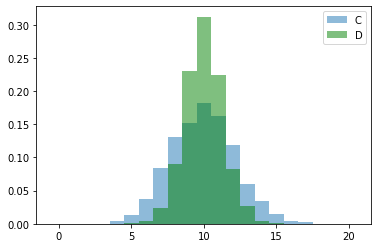

In [32]:
n0 = 20
N = 2000
muestraC = [C() for i in range(N)]
muestraD = [D() for i in range(N)]

plt.hist(muestraC, bins=[k+0.5 for k in range(-1,n0+1)], 
         density=1,alpha=0.5, label='C')
plt.hist(muestraD, bins=[k+0.5 for k in range(-1,n0+1)], 
         density=1,alpha=0.5, color='green', label='D')
plt.legend()
plt.show()

Aunque tienen la misma esperanza, la variable D tiende a tomar valores más cercanos a la media que C.

### Varianza y desviación típica

Las dos medidas de dispersión más habituales intentan reducir el "grado de dispersión" a un sólo número real.

 - La **varianza** es el promedio de la distancia a la media, elevada al cuadrado.
    - $X$ es una VA con función de masa p.
    - $E[X] = \Sigma_{a\in F}\: a\:p(a)$ es la esperanza de $X$ (es un número real).
    - $X - E[X]$ es una VA (a una variable aleatoria le restamos un número).
    - $(X - E[X])^2$ es una VA, resultado de transformar $X$ mediante la función $g(t) = (t - E[X])^2$
    - Definimos la **varianza** de $X$ como la esperanza de $(X - E[X])^2$:
$$
Var[X] = E[(X - E[X])^2] = \Sigma_{a\in F}\: (a - E[X])^2\:p(a)
$$

La varianza tiene las unidades de $X$ al cuadrado. Sin embargo, dado que es un promedio de números positivos, es siempre positiva, por lo que podemos tomar su raíz cuadrada positiva:
 
 - La **desviación típica** es la raíz cuadrada de la varianza, para que tenga las mismas unidades que la variable aleatoria. Es una medida de la **dispersión** de la distribución.

$$
\sigma[X] = \sqrt{Var[X]}= \sqrt{E[(X - E[X])^2]} = \sqrt{\Sigma_{a\in F}\: (a - E[X])^2\:p(a)}
$$


In [33]:
n0 = 10
p0 = 0.1
Bin = st.binom(n=n0, p=p0)
#scipy stats puede calcular el promedio, la varianza y la desviacion tipica de Bin
print(Bin.mean(), Bin.var(), Bin.std())
#Obtenemos los mismos valores que vienen en la wikipedia
print(n0*p0, n0*p0*(1-p0), np.sqrt(n0*p0*(1-p0)))

1.0 0.9 0.9486832980505138
1.0 0.9 0.9486832980505138


### Ejercicio

Aproxima mediante una simulación la desviación típica de las variables C y D del ejemplo anterior:

 - C, que sigue una distribución binomial con n=20 y p=0.5
 - D, que es la suma de dos variables independientes $D_1, D_2$:
     - $D_1$ sigue una distribución binomial con n=10 y p=0.1
     - $D_2$ sigue una distribución binomial con n=10 y p=0.9

In [34]:
N = len(muestraD)
media = sum(muestraD)/N
var = sum((k-media)**2  for k in muestraD)/N
std = np.sqrt(var)
print(media, var)
print(std)

9.9825 1.7811937499999946
1.3346137081567815


In [35]:
#La varianza de C es n*p*(1-p)=5, y su desviación estándar es mayor que la de D
np.sqrt(5)

2.23606797749979

### Ejercicio
 - Escribe código que simule extracciones aleatorias de un espacio de probabilidad continuo, donde todos los números reales entre 0 y 10 son igual de probables. (Pista: usa random.random())
 - Define una variable aleatoria X(t)=_"1 si t es menor o igual que 5 y 0 en otro caso"_. ¿Qué tipo de variable aleatoria es X?
 - Define una variable aleatoria Y(t)= _"parte entera de t"_. Escribe su función de masa.
 - Aproxima mediante simulación la probabilidad $P(3X\leq Y)$.
 - Haz simulaciones de X e Y, dibuja sus histogramas.

### Ejercicio
 - Escribe código que simule extracciones aleatorias de un espacio de probabilidad continuo, donde todos los números entre 0 y 10 son igual de probables. (Pista: usa random.random())
 - Define una variable aleatoria $Z(t)=t^2$. ¿Qué tipo de variable aleatoria es Z?
 - Define una variable aleatoria X(t)=*"1 si Z(t) es menor o igual que 5 y 0 en otro caso"*. ¿Qué tipo de variable aleatoria es X?
 - Define una variable aleatoria Y(t)= *"parte entera de Z(t)"*.
 - Aproxima mediante simulación la probabilidad $P(3X\leq Y)$.
 - Haz simulaciones de X e Y, dibuja sus histogramas. Compara los resultados con los del ejercicio anterior.

### Ejercicio

Un estudiante se presenta a un test y sabe la respuesta de una proporción p de las preguntas.

Si no sabe la respuesta, intentará responder al azar una de las cinco opciones disponibles.

 - Si acierta la pregunta, recibirá un 1
 - Si falla la pregunta, recibirá ``-b``, donde ``b`` es un parámetro real.

Se pide responder a estas cuestiones, de forma analítica:

  1. Define la variable aleatoria X = "puntuación en la pregunta"
  2. Si b=0, calcula la esperanza de X.
  3. Encuentra el valor de b para el que la esperanza de X es p.